#### hello boys

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('./data/hourlyData.csv')
df.head()

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand
0,2000-01-01 00:00:00,5,0,1,17.483571,0,0.853473,512.319382
1,2000-01-01 01:00:00,5,1,1,14.308678,0,4.869377,439.055673
2,2000-01-01 02:00:00,5,2,1,18.238443,0,4.997991,539.090652
3,2000-01-01 03:00:00,5,3,1,22.615149,0,2.738188,523.248968
4,2000-01-01 04:00:00,5,4,1,13.829233,0,7.694527,516.822822


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210361 entries, 0 to 210360
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timestamp           210361 non-null  object 
 1   day_of_week         210361 non-null  int64  
 2   hour_of_day         210361 non-null  int64  
 3   is_weekend          210361 non-null  int64  
 4   temperature         210361 non-null  float64
 5   is_holiday          210361 non-null  int64  
 6   solar_generation    210361 non-null  float64
 7   electricity_demand  210361 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 12.8+ MB


In [5]:
df.describe()   

,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand
count,210361.000000,210361.000000,210361.000000,210361.000000,210361.000000,210361.000000,210361.000000
mean,3.000242,11.499945,0.285799,26.300275,0.000342,97.050699,524.701078
std,2.000011,6.922232,0.451795,8.179157,0.018497,99.936662,89.992019
min,0.000000,0.000000,0.000000,-6.476955,0.000000,0.000008,175.407702
25%,1.000000,5.000000,0.000000,21.201832,0.000000,5.469050,460.008784
50%,3.000000,11.000000,0.000000,27.892322,0.000000,69.389236,521.006999
75%,5.000000,17.000000,1.000000,32.191361,0.000000,184.125301,585.735066
max,6.000000,23.000000,1.000000,49.590925,1.000000,299.996731,855.197655


In [6]:
df.isnull().sum()   

timestamp             0
day_of_week           0
hour_of_day           0
is_weekend            0
temperature           0
is_holiday            0
solar_generation      0
electricity_demand    0
dtype: int64

In [7]:
df['lag_demand_t-1'] = df['electricity_demand'].shift(1)
df['lag_demand_t-24'] = df['electricity_demand'].shift(24)
df['lag_solar_t-1'] = df['solar_generation'].shift(1)
df['lag_solar_t-24'] = df['solar_generation'].shift(24)

In [8]:
df.head()

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand,lag_demand_t-1,lag_demand_t-24,lag_solar_t-1,lag_solar_t-24
0,2000-01-01 00:00:00,5,0,1,17.483571,0,0.853473,512.319382,NaN,NaN,NaN,NaN
1,2000-01-01 01:00:00,5,1,1,14.308678,0,4.869377,439.055673,512.319382,NaN,0.853473,NaN
2,2000-01-01 02:00:00,5,2,1,18.238443,0,4.997991,539.090652,439.055673,NaN,4.869377,NaN
3,2000-01-01 03:00:00,5,3,1,22.615149,0,2.738188,523.248968,539.090652,NaN,4.997991,NaN
4,2000-01-01 04:00:00,5,4,1,13.829233,0,7.694527,516.822822,523.248968,NaN,2.738188,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210361 entries, 0 to 210360
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   timestamp           210361 non-null  object 
 1   day_of_week         210361 non-null  int64  
 2   hour_of_day         210361 non-null  int64  
 3   is_weekend          210361 non-null  int64  
 4   temperature         210361 non-null  float64
 5   is_holiday          210361 non-null  int64  
 6   solar_generation    210361 non-null  float64
 7   electricity_demand  210361 non-null  float64
 8   lag_demand_t-1      210360 non-null  float64
 9   lag_demand_t-24     210337 non-null  float64
 10  lag_solar_t-1       210360 non-null  float64
 11  lag_solar_t-24      210337 non-null  float64
dtypes: float64(7), int64(4), object(1)
memory usage: 19.3+ MB


In [10]:
df.isnull().sum()

timestamp              0
day_of_week            0
hour_of_day            0
is_weekend             0
temperature            0
is_holiday             0
solar_generation       0
electricity_demand     0
lag_demand_t-1         1
lag_demand_t-24       24
lag_solar_t-1          1
lag_solar_t-24        24
dtype: int64

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'],)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210361 entries, 0 to 210360
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   timestamp           210361 non-null  datetime64[ns]
 1   day_of_week         210361 non-null  int64         
 2   hour_of_day         210361 non-null  int64         
 3   is_weekend          210361 non-null  int64         
 4   temperature         210361 non-null  float64       
 5   is_holiday          210361 non-null  int64         
 6   solar_generation    210361 non-null  float64       
 7   electricity_demand  210361 non-null  float64       
 8   lag_demand_t-1      210360 non-null  float64       
 9   lag_demand_t-24     210337 non-null  float64       
 10  lag_solar_t-1       210360 non-null  float64       
 11  lag_solar_t-24      210337 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 19.3 MB


In [13]:
df.head()

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand,lag_demand_t-1,lag_demand_t-24,lag_solar_t-1,lag_solar_t-24
0,2000-01-01 00:00:00,5,0,1,17.483571,0,0.853473,512.319382,NaN,NaN,NaN,NaN
1,2000-01-01 01:00:00,5,1,1,14.308678,0,4.869377,439.055673,512.319382,NaN,0.853473,NaN
2,2000-01-01 02:00:00,5,2,1,18.238443,0,4.997991,539.090652,439.055673,NaN,4.869377,NaN
3,2000-01-01 03:00:00,5,3,1,22.615149,0,2.738188,523.248968,539.090652,NaN,4.997991,NaN
4,2000-01-01 04:00:00,5,4,1,13.829233,0,7.694527,516.822822,523.248968,NaN,2.738188,NaN


In [14]:
data = df[df['timestamp'] > pd.Timestamp('2013-01-01')]

In [15]:
data.head()

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand,lag_demand_t-1,lag_demand_t-24,lag_solar_t-1,lag_solar_t-24
113977,2013-01-01 01:00:00,1,1,0,10.205578,0,0.191600,478.289718,514.420742,531.101310,0.310953,9.732544
113978,2013-01-01 02:00:00,1,2,0,18.390441,0,5.371995,565.454101,478.289718,586.788222,0.191600,5.674129
113979,2013-01-01 03:00:00,1,3,0,18.447456,0,5.379952,475.546365,565.454101,547.286436,5.371995,5.417038
113980,2013-01-01 04:00:00,1,4,0,10.866460,0,0.171473,433.986943,475.546365,408.354093,5.379952,9.514147
113981,2013-01-01 05:00:00,1,5,0,16.059425,0,7.543640,554.020116,433.986943,555.542555,0.171473,6.342435


In [16]:
data.isnull().sum()

timestamp             0
day_of_week           0
hour_of_day           0
is_weekend            0
temperature           0
is_holiday            0
solar_generation      0
electricity_demand    0
lag_demand_t-1        0
lag_demand_t-24       0
lag_solar_t-1         0
lag_solar_t-24        0
dtype: int64

/tmp/ipykernel_5390/3066178524.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


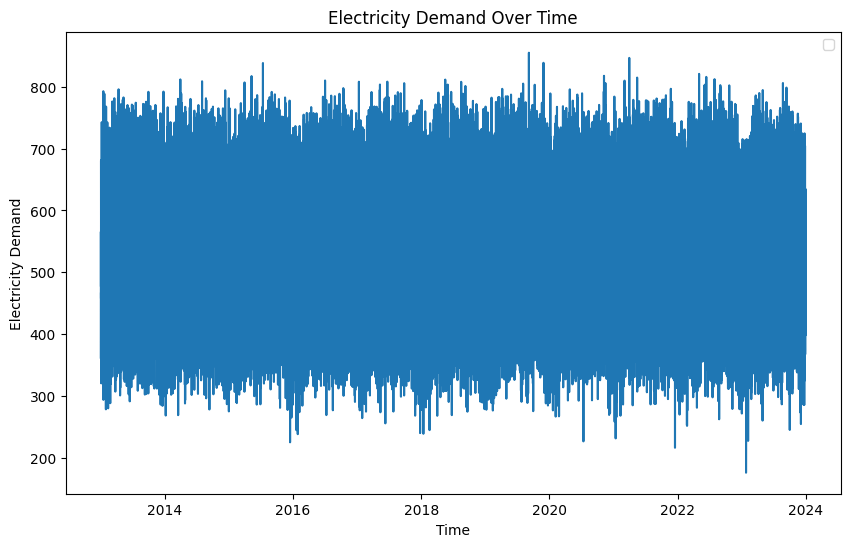

In [17]:
plt.figure(figsize=(10,6))
plt.plot(data['timestamp'], data['electricity_demand'])
plt.title('Electricity Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Electricity Demand')
plt.legend()
plt.show()

<Axes: xlabel='timestamp'>

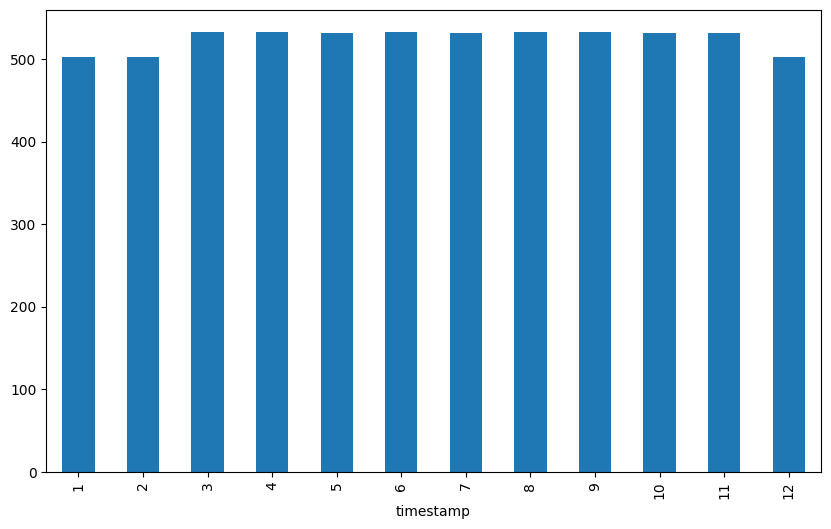

In [28]:
df.groupby((df['timestamp'].dt.month))['electricity_demand'].mean().plot(kind='bar', figsize=(10,6))

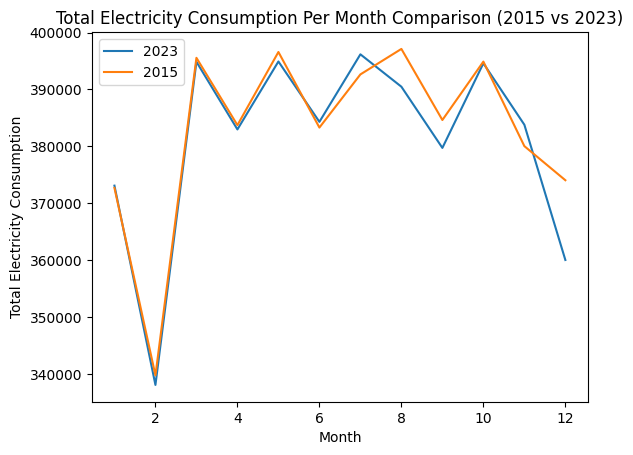

In [58]:
total_per_month_consumption_2023 = df[df['timestamp'].dt.year == 2023].groupby((df['timestamp'].dt.month))['electricity_demand'].sum()
total_per_month_consumption_2015 = df[df['timestamp'].dt.year == 2015].groupby((df['timestamp'].dt.month))['electricity_demand'].sum()
plt.plot(total_per_month_consumption_2023)
plt.plot(total_per_month_consumption_2015)
plt.title('Total Electricity Consumption Per Month Comparison (2015 vs 2023)')
plt.xlabel('Month')
plt.ylabel('Total Electricity Consumption')
plt.legend(['2023', '2015'])
plt.show()